# Beanie Coffee - Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

plt.style.use('ggplot')

In [2]:
df = pd.read_csv('Data/clean-purchases-april', index_col=0, parse_dates=True)

## Purchases over Time by Store

How does traffic flow at each of the stores? What days of the week see the most purchases? Which stores have the most sales? What times of day are the busiest? 

In [3]:
df.head()

,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,customer_id,instore_yn,order,line_item_id,product_id,...,customer_since,gender,age,birthday,product_group,product_category,product_type,product,new_product_yn,day_of_week
0,7,2019-04-01,12:04:43,3,12,558,N,1,1,52,...,1,F,37.0,2-25,Beverages,Tea,Brewed Chai tea,Traditional Blend Chai Rg,N,Monday
1,11,2019-04-01,15:54:39,3,17,781,N,1,1,27,...,1,N,29.0,7-29,Beverages,Coffee,Organic brewed coffee,Brazilian Lg,N,Monday
2,19,2019-04-01,14:34:59,3,17,788,Y,1,1,46,...,1,N,25.0,2-23,Beverages,Tea,Brewed Green tea,Serenity Green Tea Rg,N,Monday
3,32,2019-04-01,16:06:04,3,12,683,N,1,1,23,...,0,F,21.0,2-6,Beverages,Coffee,Drip coffee,Our Old Time Diner Blend Rg,N,Monday
4,33,2019-04-01,19:18:37,3,17,99,Y,1,1,34,...,2,M,53.0,1-29,Beverages,Coffee,Premium brewed coffee,Jamaican Coffee River Sm,N,Monday


In [4]:
df['transaction_date'] = pd.to_datetime(df['transaction_date'], format="%Y-%m-%d")
df['transaction_time'] = pd.to_datetime(df['transaction_time'], format='%H:%M:%S')

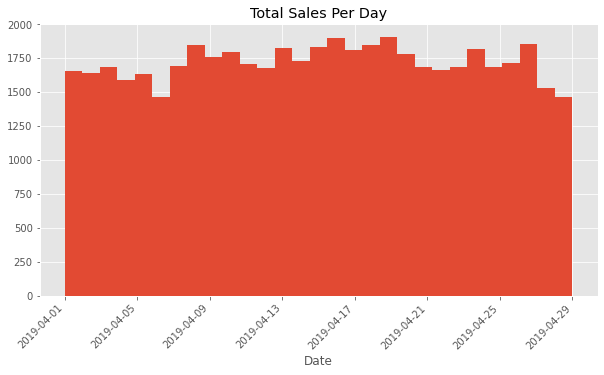

In [5]:
plt.figure(figsize=(10,5))
df['transaction_date'].hist(bins=29)
plt.title('Total Sales Per Day')
plt.xlabel('Date')
plt.xticks(rotation=45, ha='right')
plt.show()

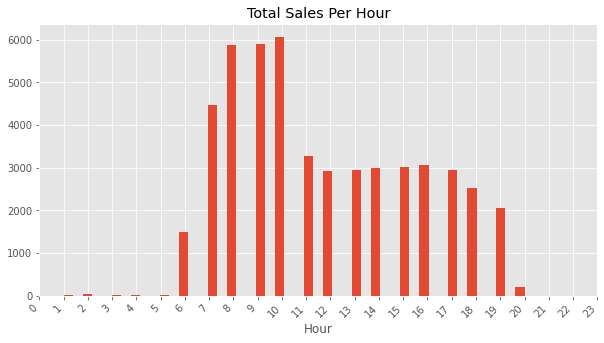

In [6]:
fig,ax = plt.subplots(figsize=(10,5))
df['transaction_time'].dt.hour.hist(bins=48)
plt.title('Total Sales Per Hour')
plt.xlabel('Hour')
ax.set_xticks(range(24))
ticklabels = [df['transaction_time'].dt.hour]
plt.xticks(rotation=45, ha='right')
plt.show()

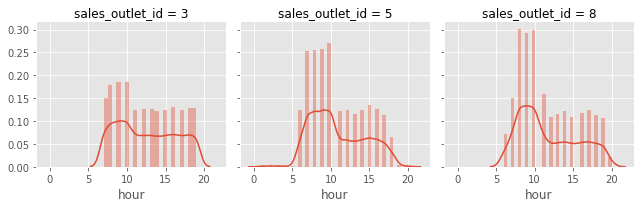

In [7]:
df['hour'] = df['transaction_time'].dt.hour
g = sns.FacetGrid(df, col="sales_outlet_id")
plt.title('Sales per Hour by Location')
g.map(sns.distplot, 'hour')
plt.show()

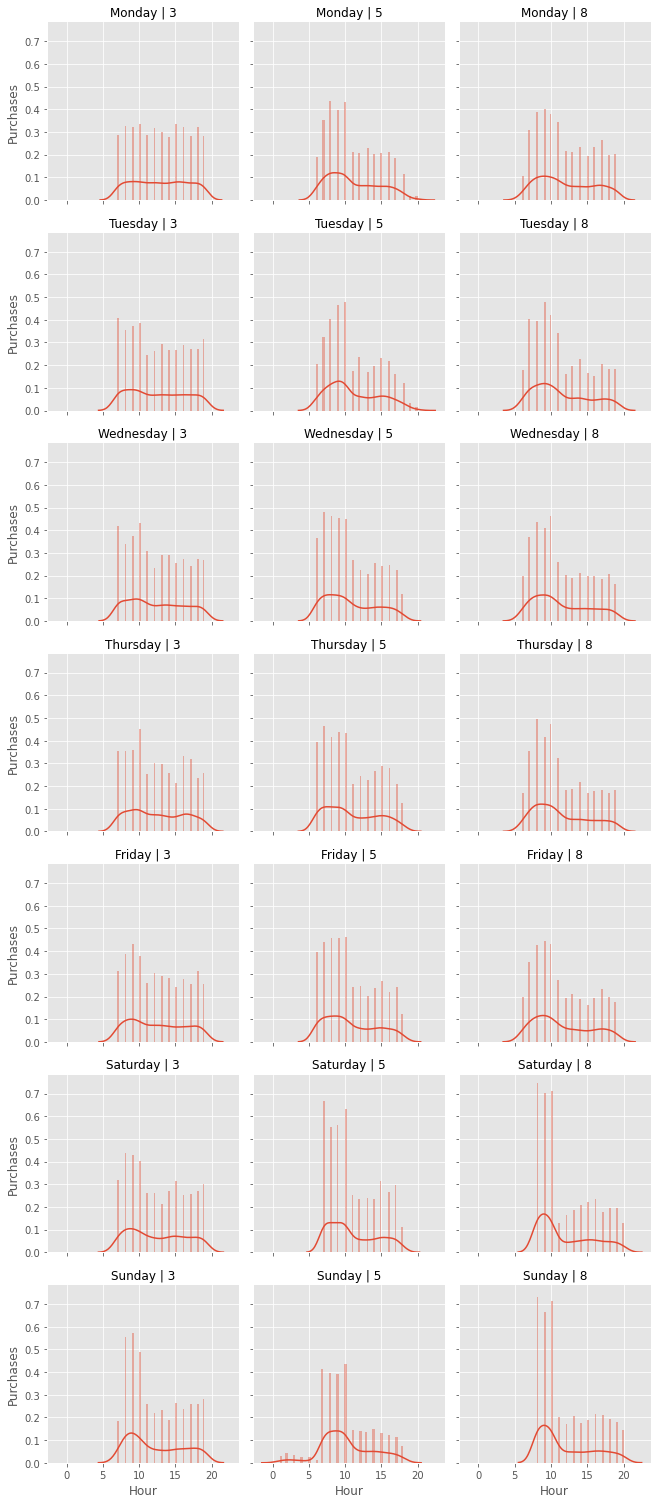

In [8]:
df['hour'] = df['transaction_time'].dt.hour
g = sns.FacetGrid(df, row="day_of_week", col='sales_outlet_id')
plt.title('Sales per Hour by Location')
g.map(sns.distplot, 'hour', bins=48)
g.set_axis_labels("Hour", "Purchases")
g.set_titles(row_template = '{row_name}', col_template = '{col_name}')
plt.show()

Locations 5 and 8 see a more distinct morning rush hour than Location 3.

In [9]:
cl = df[df['customer_id'] != 0]
ncl = df[df['customer_id'] == 0]

In [10]:
print("The Customer Loyalty dataframe's shape is " + str(cl.shape))
print("The Non Customer Loyalty dataframe's shape is " + str(ncl.shape))

The Customer Loyalty dataframe's shape is (24861, 26)
The Non Customer Loyalty dataframe's shape is (25033, 26)


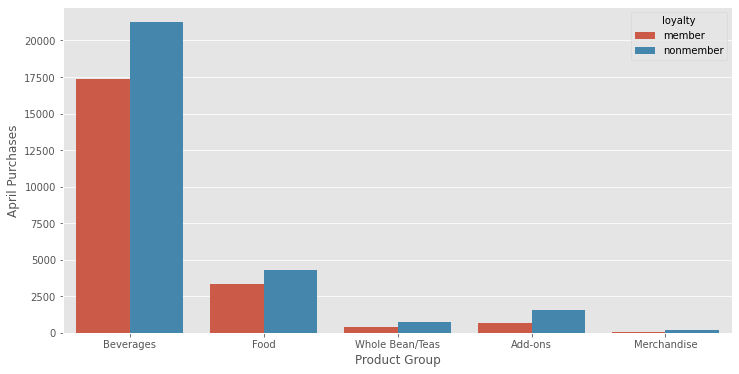

In [11]:
loyalty = df[['product_group','product_category','customer_since']]
loyalty['loyalty'] = loyalty.customer_since.apply(lambda x: 'member' if x > 0 else 'nonmember')
plt.figure(figsize=(12,6))
sns.countplot(data=loyalty, x='product_group', hue='loyalty')
plt.xlabel('Product Group')
plt.ylabel('April Purchases')
plt.show()

In [12]:
ncl.product_group.value_counts()

Beverages          18869
Food                3835
Add-ons             1466
Whole Bean/Teas      700
Merchandise          163
Name: product_group, dtype: int64

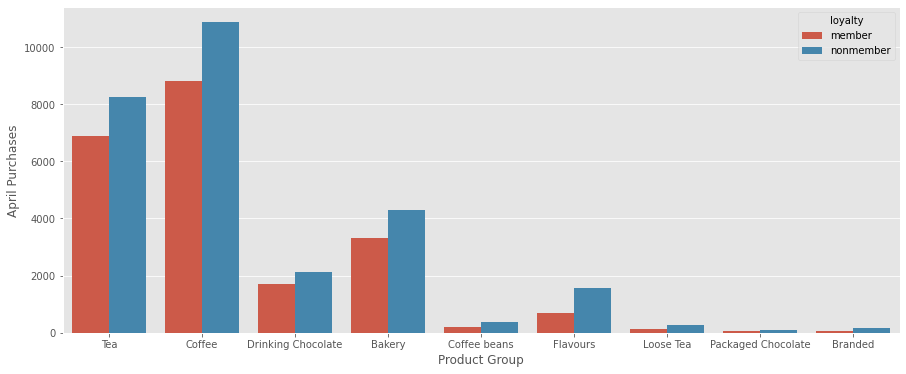

In [13]:
plt.figure(figsize=(15,6))
sns.countplot(data=loyalty, x='product_category', hue='loyalty')
plt.xlabel('Product Group')
plt.ylabel('April Purchases')
plt.show()

So, it is clear that the majority of purchases are coming from nonmembers. Which brings up the question, how many customers enrolled in the loyalty program made purchases in the last month?

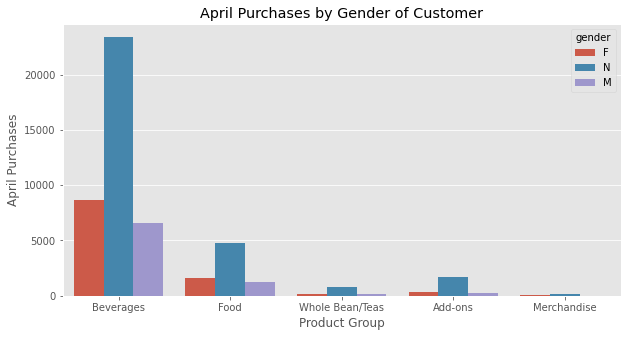

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='product_group', hue='gender')
plt.xlabel('Product Group')
plt.ylabel('April Purchases')
plt.title('April Purchases by Gender of Customer')
plt.show()

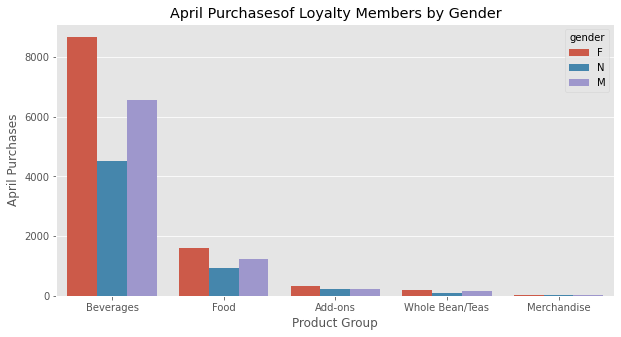

In [15]:
plt.figure(figsize=(10,5))
sns.countplot(data=cl, x='product_group', hue='gender')
plt.xlabel('Product Group')
plt.ylabel('April Purchases')
plt.title('April Purchasesof Loyalty Members by Gender')
plt.show()

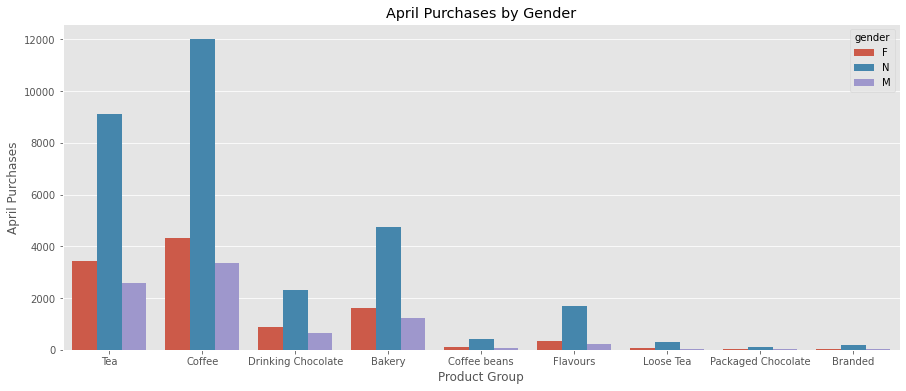

In [16]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='product_category', hue='gender')
plt.xlabel('Product Group')
plt.ylabel('April Purchases')
plt.title('April Purchases by Gender')
plt.show()

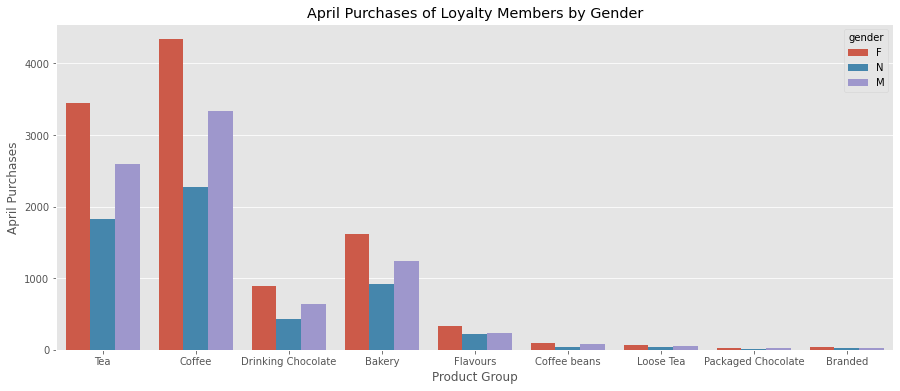

In [17]:
plt.figure(figsize=(15,6))
sns.countplot(data=cl, x='product_category', hue='gender')
plt.xlabel('Product Group')
plt.ylabel('April Purchases')
plt.title('April Purchases of Loyalty Members by Gender')
plt.show()

In [18]:
df2 = cl.copy()
df2['age_group'] = (df2['age'].astype(str).str[0] + "0").astype(int)


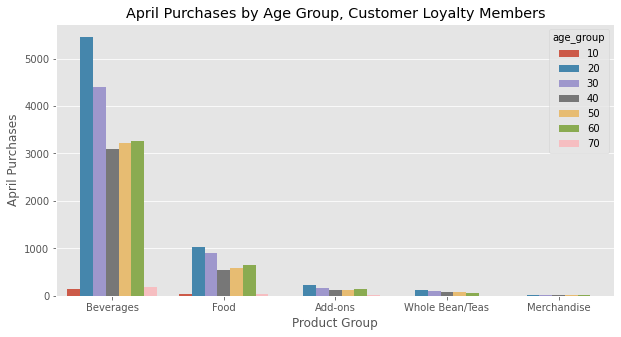

In [19]:
plt.figure(figsize=(10,5))
sns.countplot(data=df2, x='product_group', hue='age_group')
plt.xlabel('Product Group')
plt.ylabel('April Purchases')
plt.title('April Purchases by Age Group, Customer Loyalty Members')
plt.show()

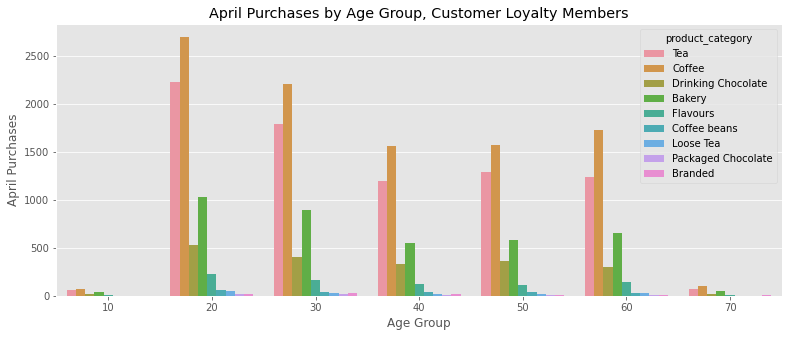

In [20]:
plt.figure(figsize=(13,5))
sns.countplot(data=df2, hue='product_category', x='age_group')
plt.xlabel('Age Group')
plt.ylabel('April Purchases')
plt.title('April Purchases by Age Group, Customer Loyalty Members')
plt.show()

Now that we have a look at some of the purchasing habits of customers by both gender and age, I want to look at what they are purchasing and find what are the most popular items in the three most popular categories.

In [21]:
coffee = df[df['product_category']=='Coffee']
tea = df[df['product_category']=='Tea']
bakery = df[df['product_category']=='Bakery']

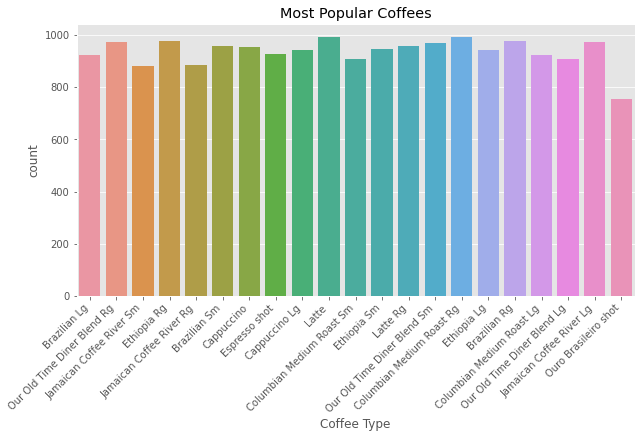

In [22]:
fig,ax = plt.subplots(figsize=(10,5))
sns.countplot(x='product', data=coffee)
plt.title('Most Popular Coffees')
plt.xlabel('Coffee Type')
plt.xticks(rotation=45, ha='right')
plt.show()

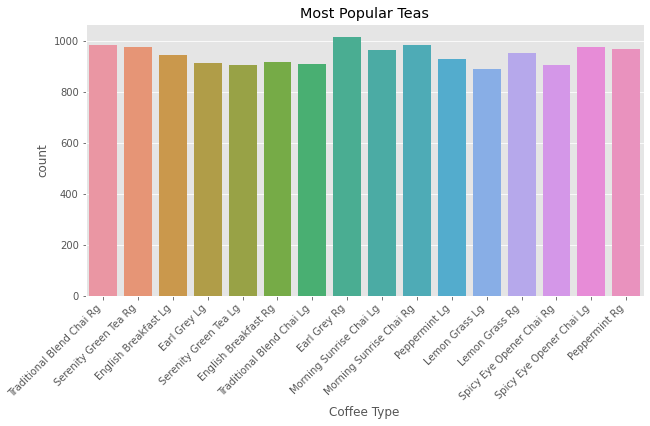

In [23]:
fig,ax = plt.subplots(figsize=(10,5))
sns.countplot(x='product', data=tea)
plt.title('Most Popular Teas')
plt.xlabel('Coffee Type')
plt.xticks(rotation=45, ha='right')
plt.show()

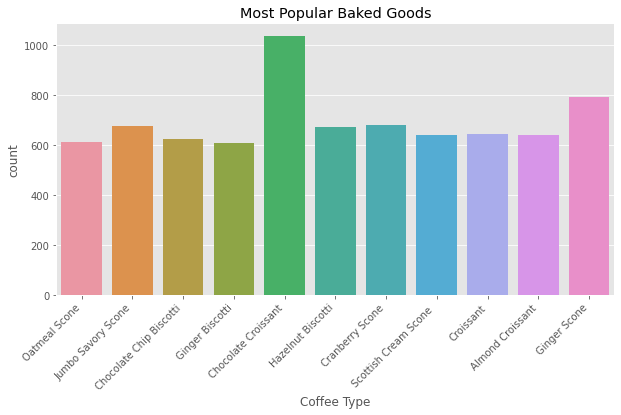

In [24]:
fig,ax = plt.subplots(figsize=(10,5))
sns.countplot(x='product', data=bakery)
plt.title('Most Popular Baked Goods')
plt.xlabel('Coffee Type')
plt.xticks(rotation=45, ha='right')
plt.show()

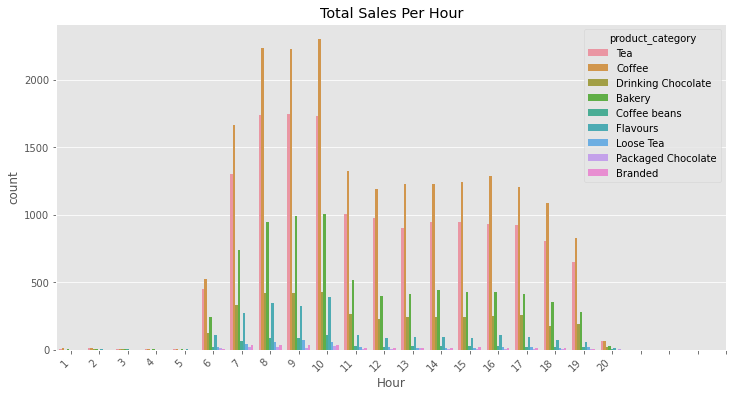

In [25]:
fig,ax = plt.subplots(figsize=(12,6))
sns.countplot(data=df, x='hour', hue='product_category')
plt.title('Total Sales Per Hour')
plt.xlabel('Hour')
ax.set_xticks(range(24))
ticklabels = [df['transaction_time'].dt.hour]
plt.xticks(rotation=45, ha='right')
plt.show()

In [26]:
df['new_product_yn'].value_counts()
#no new products launched in April

N    49894
Name: new_product_yn, dtype: int64

In [49]:
sizes = list(df[df['product_group'] == 'Beverages']['product'])
column = {}
for i in df['product']:
    if i in sizes:
        if i[-2] in ['S','L','R']:
            column[i] = i[-2]
        else:
            column[i] = 'other'
    else:
        column[i] = 'not a beverage'

<AxesSubplot:>

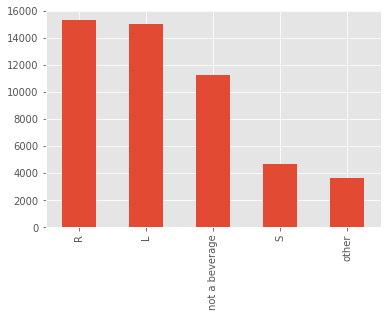

In [54]:
df['sizes'] = df['product'].map(column)
df['sizes'].value_counts().plot(kind='bar')

Coffee, unsurprisingly, is Beanie's top seller, with the latte, the regular sized Brazilian Medium Roast. Close near-best sellers include Our Old Time Diner regular sized, and Ethiopian regular, and Jamaican Coffee River Large. The least popular is the Ouro Brasiliero Shot.  

Earl Grey is the most popular tea with Peppermint, and our three varieties of Chai. 

The most popular bakery item by far is the Chocolate Croissant. 

Regular and Large drinks make up the vast majority of sales. 

# City Data

In [91]:
nyc = pd.read_csv('Data/clean-nyccds', index_col=0)
shops = pd.read_csv('Data/clean_locations.csv', index_col=0)

In [92]:
shops.head()

,sales_outlet_id,sales_outlet_type,store_square_feet,store_postal_code,store_longitude,store_latitude,Neighorhood,CD
1,3,existing,1300,11106,-73.924008,40.761196,Astoria,Queens CD 1
2,4,potential,1300,11215,-73.983984,40.677645,Gowanus,Brooklyn CD 6
3,5,existing,900,10007,-74.010130,40.713290,Lower Manhattan,Manhattan CD 1
4,6,potential,1000,10002,-73.992687,40.713852,Lower East Side,Manhattan CD 3
5,7,potential,1200,10021,-73.960000,40.770000,Upper East Side,Manhattan CD 6


In [93]:
shops = shops.merge(nyc, how='left', left_on='CD', right_on='cd_short_title')

In [94]:
shops=shops.drop(columns=['CD','store_postal_code'])

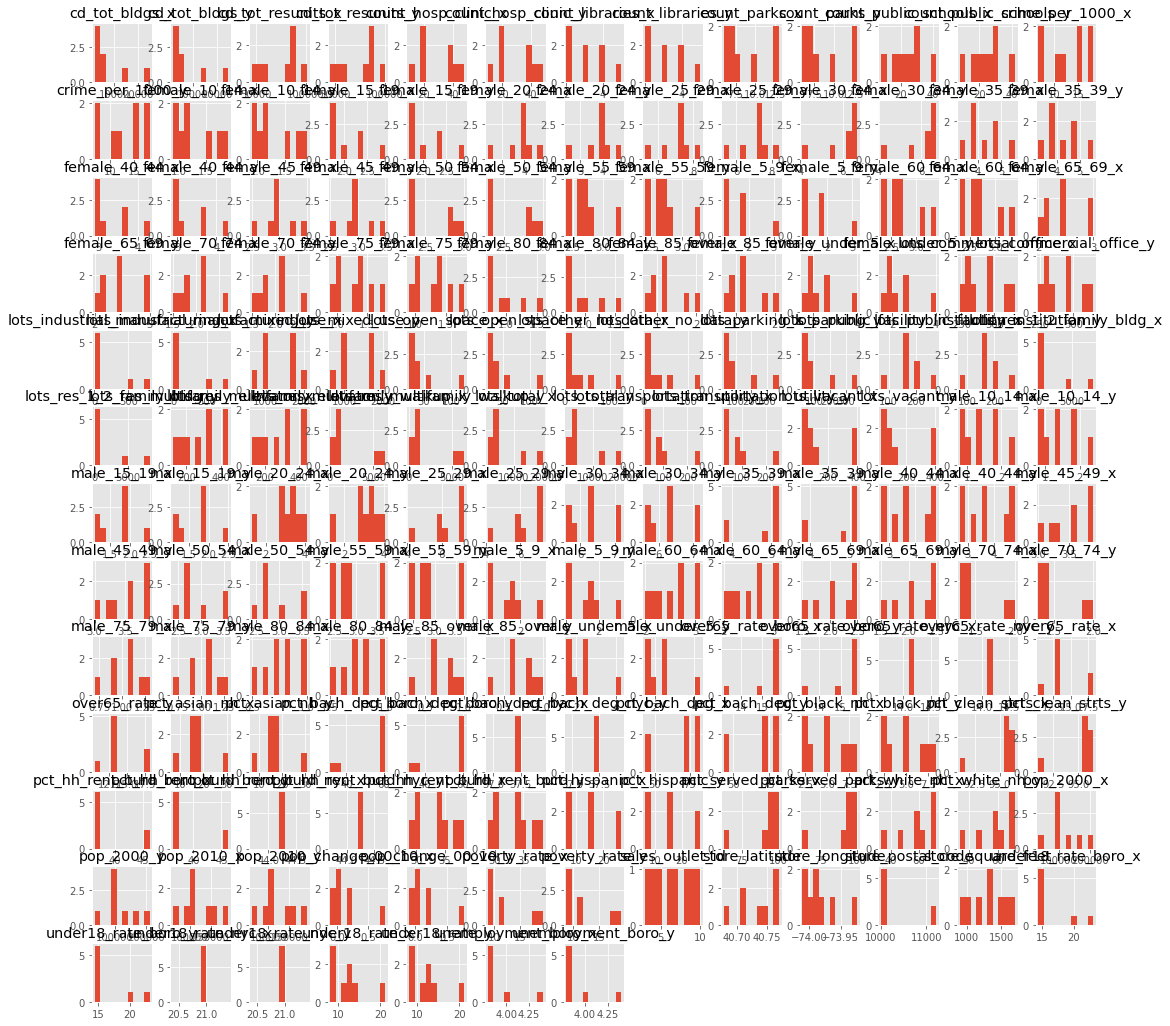

In [89]:
shops.hist(figsize=(18,18))
plt.title('{col_name}')
plt.show()

In [95]:
shops.head()

,sales_outlet_id,sales_outlet_type,store_square_feet,store_longitude,store_latitude,Neighorhood,cd_short_title,cd_tot_bldgs,cd_tot_resunits,count_hosp_clinic,...,pct_served_parks,pct_white_nh,pop_2000,pop_2010,pop_change_00_10,poverty_rate,under18_rate,under18_rate_boro,under18_rate_nyc,unemployment_boro
0,3,existing,1300,-73.924008,40.761196,Astoria,Queens CD 1,24737,89164,19,...,63,48.3,211220,191105,-0.10,18.1,14.5,20.3,20.9,4.0
1,4,potential,1300,-73.983984,40.677645,Gowanus,Brooklyn CD 6,14220,55680,18,...,94,64.1,104054,104709,0.01,9.6,21.2,23.1,20.9,4.4
2,5,existing,900,-74.010130,40.713290,Lower Manhattan,Manhattan CD 1,1725,45629,10,...,100,72.2,34420,60978,0.77,8.8,12.7,14.4,20.9,3.8
3,6,potential,1000,-73.992687,40.713852,Lower East Side,Manhattan CD 3,4644,82557,41,...,100,33.3,164407,163277,-0.01,19.3,11.4,14.4,20.9,3.8
4,7,potential,1200,-73.960000,40.770000,Upper East Side,Manhattan CD 6,3056,100985,48,...,91,69.7,136152,142745,0.05,9.8,8.8,14.4,20.9,3.8


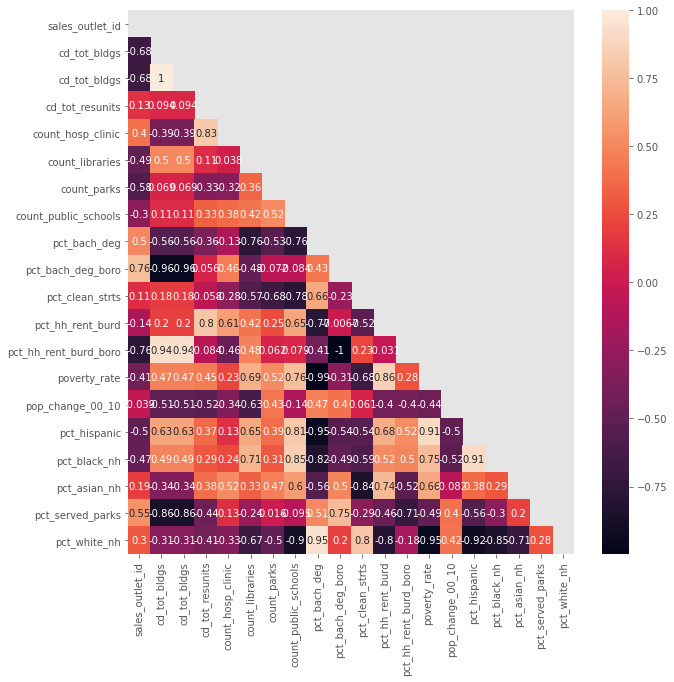

In [108]:
plt.figure(figsize=(10,10))
heatmap = shops[['sales_outlet_id','cd_tot_bldgs','cd_tot_bldgs', 'cd_tot_resunits', 'count_hosp_clinic',
                   'count_libraries', 'count_parks', 'count_public_schools', 'pct_bach_deg', 'pct_bach_deg_boro', 'pct_clean_strts', 'pct_hh_rent_burd',
                   'pct_hh_rent_burd_boro','poverty_rate','pop_change_00_10','pct_hispanic',
                   'pct_black_nh', 'pct_asian_nh', 'pct_served_parks', 'pct_white_nh']]
mask = np.triu(np.ones_like(heatmap.corr(), dtype=bool))
sns.heatmap(heatmap.corr(),annot=True, mask=mask)
plt.show()